#Imports

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cic used dataset/cic_train_set_binary.csv")
test_set = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cic used dataset/cic_test_set_binary.csv")

Mounted at /content/drive


#preparing data

In [ ]:
y_train = train_set["Label"]
x_train = train_set.drop(columns = ["Label"])

x_test = test_set.drop(columns = ["Label"])
y_test = test_set["Label"]

In [ ]:
from keras.utils import to_categorical
#one hot encoding for the labels : needed by binary_crossentropy
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

#evaluation functions

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
#detailed classification report

def evaluate_classification(y_test, y_pred):
    #donne les metrics d'evaluation, et la matrice de confustion

    # Convert one-hot encoded y_test and y_pred back to original labels
    y_test_labels = [np.argmax(label) for label in y_test]
    y_pred_labels = [np.argmax(label) for label in y_pred]

    # Calculate and print accuracy
    accuracy = np.mean(np.array(y_test_labels) == np.array(y_pred_labels))
    print("Accuracy:", accuracy)

    # Generate and print classification report
    report = classification_report(y_test_labels, y_pred_labels)
    print("Classification Report:\n", report)

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Calculate and print precision, recall, F1-score, false positive rate, false negative rate
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)
    print("False Positive Rate:", false_positive_rate)
    print("False Negative Rate:", false_negative_rate)

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics_comparison(histories, model_names):
    #comparaison entres models (training accuracy, training loss)
    # Creating subplots for accuracy and loss
    fig, axs = plt.subplots(2, 1, figsize=(6, 6))

    # Plotting training accuracy
    axs[0].set_title('Training Accuracy')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Accuracy')

    # Plotting training loss
    axs[1].set_title('Training Loss')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Loss')

    # Plotting metrics for each model
    for i, history in enumerate(histories):
        model_name = model_names[i]
        train_accuracy = history.history['binary_accuracy']
        train_loss = history.history['loss']

        # Plotting training accuracy
        axs[0].plot(train_accuracy, label=model_name)

        # Plotting training loss
        axs[1].plot(train_loss, label=model_name)

    # Adjusting spacing between subplots
    plt.tight_layout()

    # Adding legends
    axs[0].legend()
    axs[1].legend()

    # Display the plot
    plt.show()

#Classification

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import regularizers
from keras.optimizers import RMSprop
from keras.constraints import MaxNorm
from keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Reshape, Dropout, Dense, Activation, Bidirectional, Flatten
import tensorflow_probability as tfp

### Lstm

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68, 32)            64        
                                                                 
 dense_1 (Dense)             (None, 68, 128)           4224      
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 2

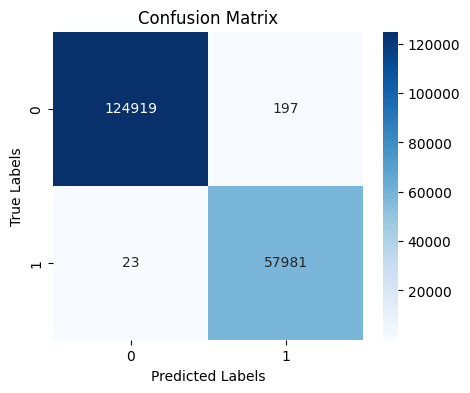

Precision: 0.9966138402832686
Recall: 0.9996034756223708
F1-Score: 0.9981064192387805
False Positive Rate: 0.001574538827967646
False Negative Rate: 0.000396524377629129


In [ ]:
lstm = Sequential()
lstm.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],1)))
lstm.add(Dense(128, activation ='relu'))
lstm.add(LSTM(128, return_sequences=False))
lstm.add(Dense(64, activation='relu'))
lstm.add(Dense(128, activation='relu'))
lstm.add(Dropout(0.5))
lstm.add(Dense(2, activation='sigmoid'))

lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss='binary_crossentropy', metrics=['binary_accuracy'])
lstm.summary()

# Train the lstm
history4 = lstm.fit(x_train, y_train_encoded, epochs=50,batch_size = 64)
y_pred = lstm.predict(x_test)
evaluate_classification(y_test_encoded, y_pred)


### cnn-lstm

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 68, 32)            64        
                                                                 
 conv1d (Conv1D)             (None, 66, 128)           12416     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 33, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 33, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 33, 128)           0         
                                                                 
 flatten (Flatten)           (None, 4224)              0         
                                                      

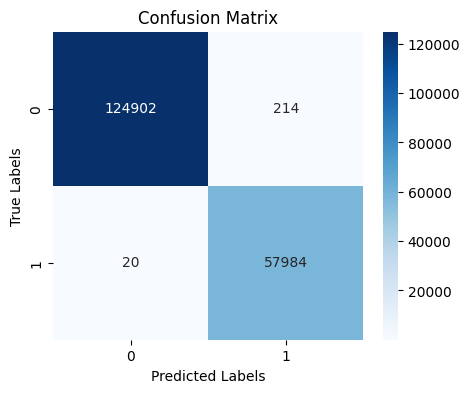

Precision: 0.9963228976940788
Recall: 0.999655196193366
F1-Score: 0.9979862652966386
False Positive Rate: 0.0017104127369800826
False Negative Rate: 0.0003448038066340252


In [ ]:
cnn_lstm = Sequential()
cnn_lstm.add(Dense(32, activation='relu', input_shape=(x_train.shape[1], 1)))
cnn_lstm.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn_lstm.add(MaxPooling1D(pool_size=2))
cnn_lstm.add(LSTM(128, return_sequences=True))
cnn_lstm.add(Dropout(0.3))
cnn_lstm.add(Flatten())
cnn_lstm.add(Dense(128, activation='relu'))
cnn_lstm.add(Dense(2, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compile the cnn_lstm
cnn_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss='binary_crossentropy', metrics=['binary_accuracy'])

cnn_lstm.summary()
# Train the cnn_lstm
history6 = cnn_lstm.fit(x_train, y_train_encoded, epochs=50,batch_size = 64)
y_pred = cnn_lstm.predict(x_test)
evaluate_classification(y_test_encoded, y_pred)


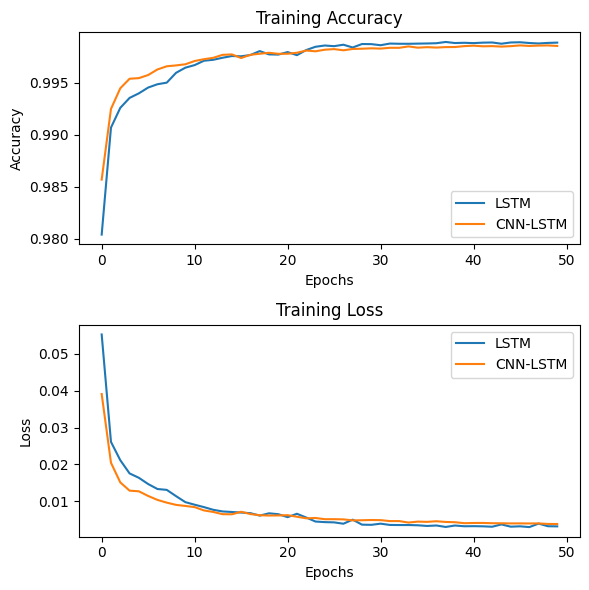

In [ ]:
histories = [ history4, history6]
model_names = [ 'LSTM', 'CNN-LSTM']
plot_metrics_comparison(histories, model_names)

In [ ]:
cnn_lstm.save("/content/drive/MyDrive/Colab Notebooks/h5 models/CNN_LSTM_binary_cic_ids_2017.h5")

In [ ]:
lstm.save("/content/drive/MyDrive/Colab Notebooks/h5 models/LSTM_binary_cic_ids_2017.h5")